In [96]:
## Load required packages
%pylab inline --no-import-all
import numpy as np
import numpy
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


In [97]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [98]:
## Check shapes and types of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


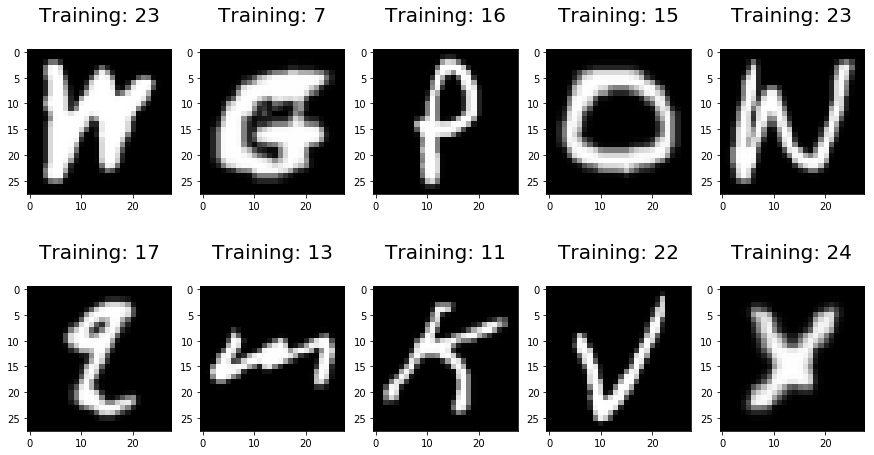

In [104]:
## Display example digits
plt.figure(figsize=(15,8))
for index, (image, label) in enumerate(zip(img[0:10], lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

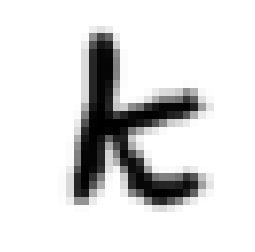

In [10]:
## Source: Hands-On Machine Learning Book
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train[36000]
#print(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

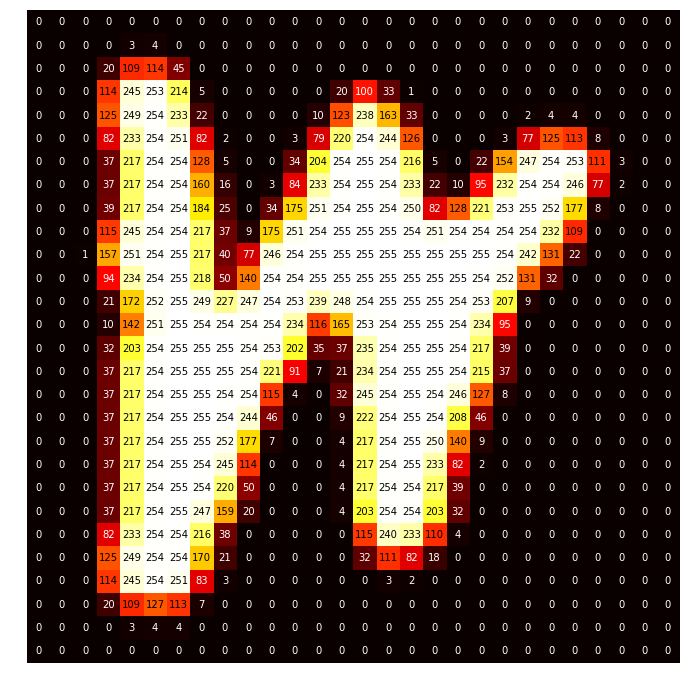

In [105]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

visualize_input(img[0,:].reshape(28,28), ax)

#plt.title(img[3,0])
plt.axis("off")
plt.show()

## source: https://www.kaggle.com/darkside92/simple-best-digit-recognizer-with-cnn-top-5/comments#497794

In [106]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [113]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [108]:
# Change data tyoe to float and normalize pixel data
norm = MinMaxScaler()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

In [109]:
## Encode categorical label data
lb = LabelBinarizer()
Y = lb.fit_transform(y_train)
X = x_train
Y_test = lb.fit_transform(y_test)
X_test = x_test

In [114]:
## Check shapes
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(99840, 784)
(99840, 26)
(24960, 784)
(24960, 26)


In [115]:
# K-fold Cross Validation model evaluation
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# define 5-fold cross validation test
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kf.split(X, Y):
  # create model
    model = Sequential()
    model.add(Dense(256, input_dim=784, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(26, activation='softmax'))
    # Compile model
    opt = Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ["accuracy"])
    # Fit the model
    model.fit(X[train], Y[train], epochs=5, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 87.03%
accuracy: 87.70%
accuracy: 87.60%
accuracy: 87.27%
accuracy: 86.61%
87.24% (+/- 0.39%)


In [125]:
## Define the model (same as above)
## TBD: Conv2d - https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e
model = Sequential()
# Add two hidden layers, use the relu activation.
model.add(Dense(256, input_dim=784, activation='relu')) # activation could also be "tanh"
model.add(Dense(128, activation='relu'))
# The final layer is the output layer with an inverse logit activation function.
model.add(Dense(26, activation='softmax'))
# Use the Adam optimizer. Adam works similar to regular SGD, 
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ["accuracy"])

In [126]:
# Fit data to model
history = model.fit(X, Y,
            batch_size=128,
            epochs=5,
            verbose=0, validation_data=(X_test, Y_test))

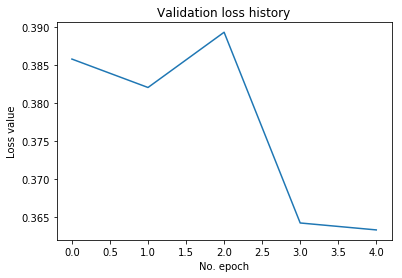

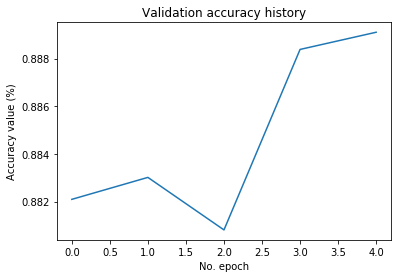

In [119]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

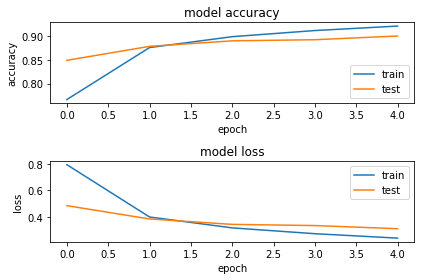

In [127]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [128]:
# Generate generalization metrics
score = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.3103224592307248 / Test accuracy: 0.8998798131942749


In [122]:
loss_and_metrics_train = model.evaluate(X, Y, verbose=2)
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Train Loss 0.23507210018698318
Train Accuracy 0.9231770634651184

Test Loss 0.3633645441383123
Test Accuracy 0.889102578163147


In [ ]:
## Compare models  different parameters
## TBD: Add CV here?

settings = []

for a in ['tanh', 'relu']:
    for o in ['adam']:
        for e in [1, 5, 10]:
            model = Sequential()
            model.add(Dense(256, input_dim=784, activation=a))
            model.add(Dense(128, activation=a))
            model.add(Dense(26, activation='softmax'))
            model.compile(optimizer=o, loss='categorical_crossentropy', metrics = ["accuracy"]) 
            model.fit(X, Y, batch_size=32, epochs=e, verbose=0, validation_data=(X_test, Y_test))
            score = model.evaluate(X_test, Y_test, verbose=0)
            settings.append((a, o, e, score[0], score[1]))
            print(settings[-1])

best_loss = min(settings, key=lambda x: x[-2])
best_accuracy =  max(settings, key=lambda x: x[-1])
print("Best settings according to loss {}".format(best_loss))
print("Best settings according to accuracy {}".format(best_accuracy))

In [48]:
#model.predict_classes(X_test)

In [82]:
#model.predict(X_test)

In [ ]:
## Logistic Regression
## Source: https://www.codementor.io/@mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh

In [139]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

In [161]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"]
    lbl = data["y"]

In [162]:
## Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [163]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [164]:
# Change data tyoe to float and normalize pixel data
norm = MinMaxScaler()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

In [165]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(24960, 784)
(60000,)
(24960,)


In [166]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([25], dtype=uint8)

In [168]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[25 22 14 ...  4 22  5]


In [169]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(logisticRegr.predict(x_test), y_test)
print("Accuracy: {:.3}".format(acc))

Accuracy: 0.71


In [135]:
##https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', alpha=0.0001,
                    solver='adam', tol=1e-4, random_state=1,
                    learning_rate_init=.001, verbose=False)

In [136]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 5.14509314
Iteration 2, loss = 1.76317707
Iteration 3, loss = 1.32024898
Iteration 4, loss = 1.10177778
Iteration 5, loss = 0.95408045
Iteration 6, loss = 0.85692537
Iteration 7, loss = 0.77482172
Iteration 8, loss = 0.71133903
Iteration 9, loss = 0.66108680
Iteration 10, loss = 0.62616953
Iteration 11, loss = 0.60242221
Iteration 12, loss = 0.58232055
Iteration 13, loss = 0.55868025
Iteration 14, loss = 0.54002454
Iteration 15, loss = 0.52620515
Iteration 16, loss = 0.52337855
Iteration 17, loss = 0.51058240
Iteration 18, loss = 0.51167616
Iteration 19, loss = 0.49203937
Iteration 20, loss = 0.49141234
Iteration 21, loss = 0.47774900
Iteration 22, loss = 0.47102178
Iteration 23, loss = 0.46511899
Iteration 24, loss = 0.46839360
Iteration 25, loss = 0.45432236
Iteration 26, loss = 0.44195277
Iteration 27, loss = 0.43883242
Iteration 28, loss = 0.42836742
Iteration 29, loss = 0.43423727
Iteration 30, loss = 0.43885055
Iteration 31, loss = 0.42287249
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [137]:
predictions = mlp.predict(x_test)

In [175]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)
print("Accuracy: {:.3}".format(acc))

Accuracy: 0.805


In [170]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train) # y_train, not y_train_5

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [171]:
sgd_clf.predict(x_test)

array([25, 22, 14, ...,  4, 22,  5], dtype=uint8)

In [176]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(sgd_clf.predict(x_test), y_test)
print("Accuracy: {:.3}".format(acc))

Accuracy: 0.629


In [173]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
forest_clf.predict_proba(x_test)

array([[0.3, 0. , 0. , ..., 0.4, 0.2, 0. ],
       [0. , 0. , 0. , ..., 0.1, 0.1, 0. ],
       [0.3, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.1, 0. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0.3, 0. ],
       [0.1, 0. , 0. , ..., 0. , 0. , 0.1]])

In [177]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(forest_clf.predict(x_test), y_test)
print("Accuracy: {:.3}".format(acc))

Accuracy: 0.805


In [178]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

In [179]:
cm = metrics.confusion_matrix(y_test, predictions)

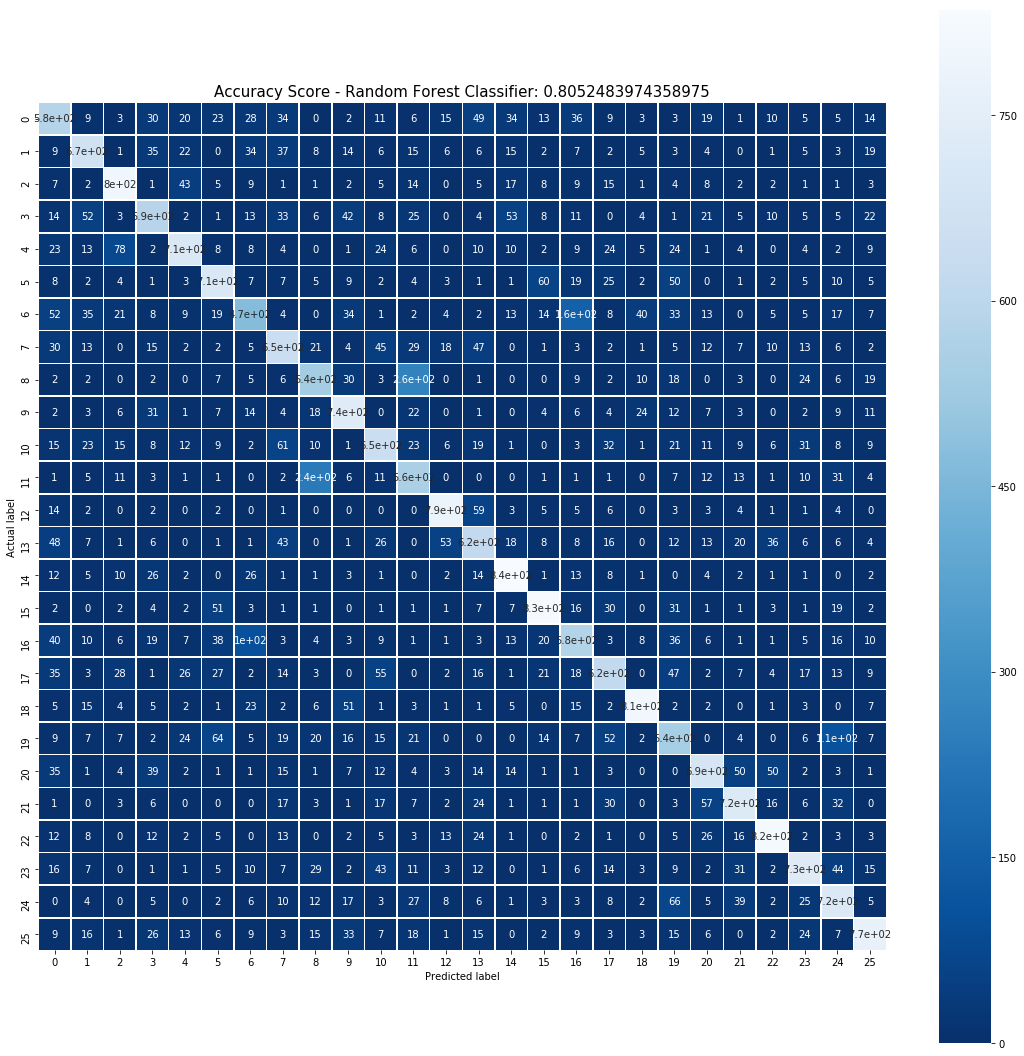

In [182]:
plt.figure(figsize=(19,19))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score - Random Forest Classifier: {0}'.format(acc)
plt.title(all_sample_title, size = 15);
plt.savefig('Letters_CM.png')
plt.show()

In [ ]:
## Image can be changed

In [7]:
## Task 2
## Load data
testdata = np.load('test-dataset.npy')
 #   img2 = data["x"] ## test dataset
  #  lbl2 = data["y"]

In [10]:
print(testdata.shape)
print(type(testdata))

(10000, 30, 168)
<class 'numpy.ndarray'>


In [15]:
print(testdata[0,0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  62.   0. 110. 255.   0.   0. 255. 198.   0.   0.   0.
 231.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 230. 249.   0.   0.   0.   0.   0. 118.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 182.   0.   0. 130. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0.  31.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0. 225.   0.   0.   0.   0.   0.   0.   0.]


In [16]:
print(testdata[0,0].shape)

(168,)
